<a href="https://colab.research.google.com/github/ChristeenaGiji/ANN-Deep-Learning/blob/main/ANN_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [6]:
!pip install tensorflow-gpu==2.9.0



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
##Divide the dataset into indep(X) and dep features

In [4]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [5]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [7]:
#Feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [35]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
#Concatentate these variables with dataframe
x=x.drop(['Geography','Gender'],axis=1)

In [9]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [10]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


##Feature scaling is required for below algorithm
ANN,Logistic Regression, KNN, k-means
Not Reuired for
Decison tree, Random forest, XgBoost
Criteria for Feature Scaling:
1. distance based
2. Gradient descent(optimisers)

Standard scaler we are using where z score or the data is normalised and rotate around mean
min max is used in cnn where range between 0 to 1 or -1 to 1

In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# we fit.transform to train data and not test data becasue to avoid bias and data leakage to test dat


In [12]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [13]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [14]:
x_train.shape

(8000, 8)

#Part-2 ANN Creation

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

1. Sequential
2. dense
3. Activation Function

In [16]:
###Lets initialise the ANN
classifier=Sequential()

In [19]:
##Adding input layer
classifier.add(Dense(units=11,activation='relu'))
#relu to next layer

In [42]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [44]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [45]:
##Adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [46]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
##default learning rate of 0.01.If we want, we can add learning rate using tensorflow.keras
import tensorflow
adam=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

#Early Stopping

In [48]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [49]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.5498 - accuracy: 0.8377 - val_loss: 0.4533 - val_accuracy: 0.8478
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.8461 - val_loss: 0.4067 - val_accuracy: 0.8485
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8479 - val_loss: 0.3984 - val_accuracy: 0.8448
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4056 - accuracy: 0.8528 - val_loss: 0.3925 - val_accuracy: 0.8391
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3941 - accuracy: 0.8524 - val_loss: 0.3915 - val_accuracy: 0.8432
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3758 - accuracy: 0.8558 - val_loss: 0.3898 - val_accuracy: 0.8410
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3742 - accuracy: 0.8563 - val_loss: 0.3866 - val_accuracy:

In [50]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

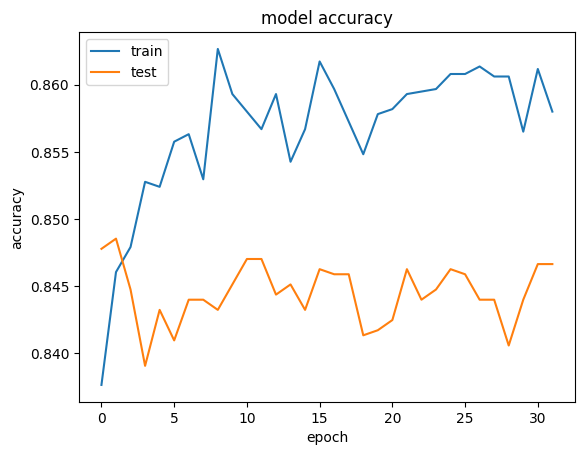

In [51]:
#summarise the history of accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

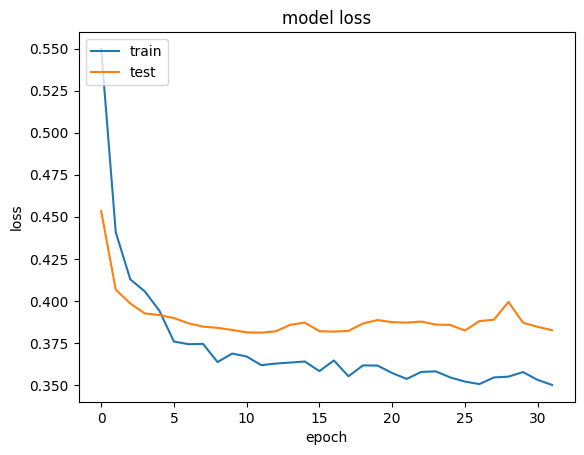

In [52]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


# Part 3- Making predictions and evaluating the model

In [53]:
#Predicting the test set results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [54]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1557,   38],
       [ 261,  144]])

In [55]:
##calculate the accuarcy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [56]:
score

0.8505

In [57]:
##how to get the weights
classifier.get_weights()

[array([[ 0.25561583, -0.06059217,  0.379886  ,  0.05317735, -0.9158949 ,
         -0.06325705, -0.35754874,  0.2750573 ,  0.02018082,  0.13645698,
          0.06794563],
        [ 0.5222511 , -0.1711273 , -0.11594395, -0.218642  , -0.6414342 ,
          0.47568473, -0.23775092, -0.8800343 ,  1.0814623 , -1.1366391 ,
          0.1400434 ],
        [ 0.22639616, -0.15434393,  0.24235493,  0.32083058,  0.5881261 ,
         -0.41022432,  0.24068195, -0.18308665,  0.28070953,  0.13254644,
         -0.4688438 ],
        [-1.2049415 ,  0.27459633, -0.24108085, -0.8217119 ,  0.43098995,
          0.15770929, -0.42584237, -0.0775407 ,  0.12207402, -0.14097215,
         -0.8130318 ],
        [ 0.33311734,  0.85709614, -0.5665833 ,  0.20770955,  0.20329204,
         -0.3151465 , -0.99668   ,  0.6644258 ,  0.8384267 , -0.14857459,
         -0.1691246 ],
        [-0.03608562, -0.0980267 ,  0.35860112, -0.316939  , -0.09044   ,
         -0.21362075,  0.03475278,  0.00974877,  0.11977627,  0.1564011